# **1. Perkenalan Dataset**
Sumber Dataset: - kaggle

# **2. Import Library**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [93]:
github_url = "https://raw.githubusercontent.com/DickySaragih/dataset/refs/heads/main/dataset/combined_financial_data_idx.csv"
df = pd.read_csv(github_url)

In [94]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB
None
  symbol                                     account type          2020  \
0   AALI                            Accounts Payable   BS  7.702640e+11   
1   AALI                         Accounts Receivable   BS  7.658490e+11   
2   AALI                    Accumulated Depreciation   BS -1.092095e+13   
3   AALI                  Additional Paid In Capital   BS  3.878995e+12   
4   AALI  Allowance For Doubtful Accounts Receivable   BS -2.426100e+10   

           2021          2022          202

# **4. Exploratory Data Analysis (EDA)**


In [95]:

df_numeric = df.drop(columns=["symbol", "account", "type"], errors='ignore')

df_numeric = df_numeric.fillna(df_numeric.median())

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

In [96]:
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

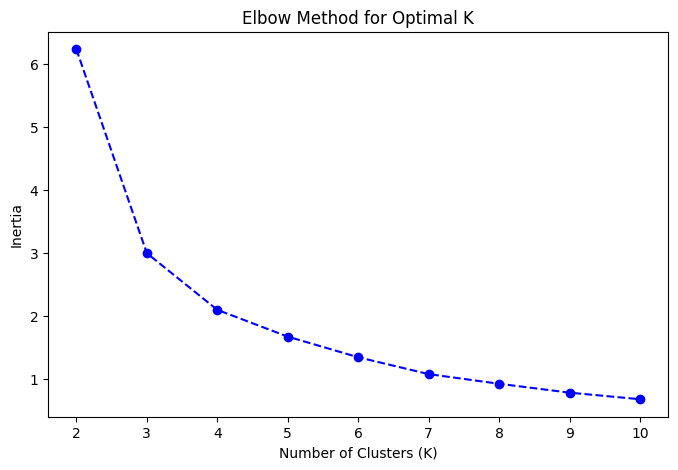

In [97]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# **5. Data Preprocessing**

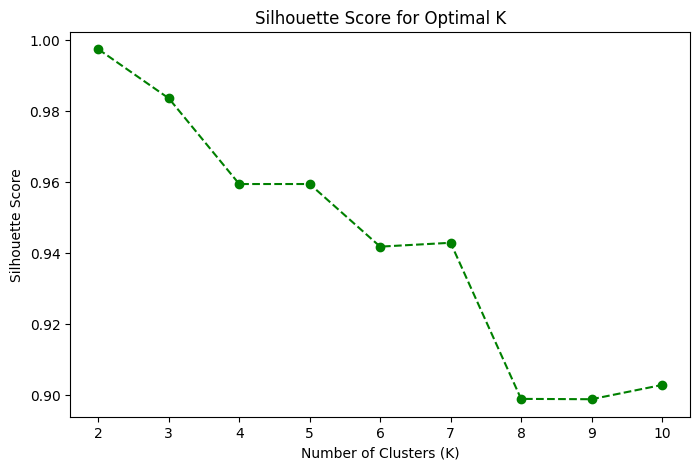

In [98]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [99]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train)
X_train['Cluster'] = kmeans.labels_


## **b. Evaluasi Model Clustering**

In [100]:
optimal_k_elbow = np.argmin(np.diff(inertia)) + 1
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]

print(f"Optimal K (Elbow Method): {optimal_k_elbow}")
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")

optimal_k = optimal_k_silhouette
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]

print(f"Optimal K (Elbow Method): {optimal_k_elbow}")
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")

optimal_k = optimal_k_silhouette





Optimal K (Elbow Method): 1
Optimal K (Silhouette Score): 2
Optimal K (Elbow Method): 1
Optimal K (Silhouette Score): 2


## **c. Visualisasi Hasil Clustering**

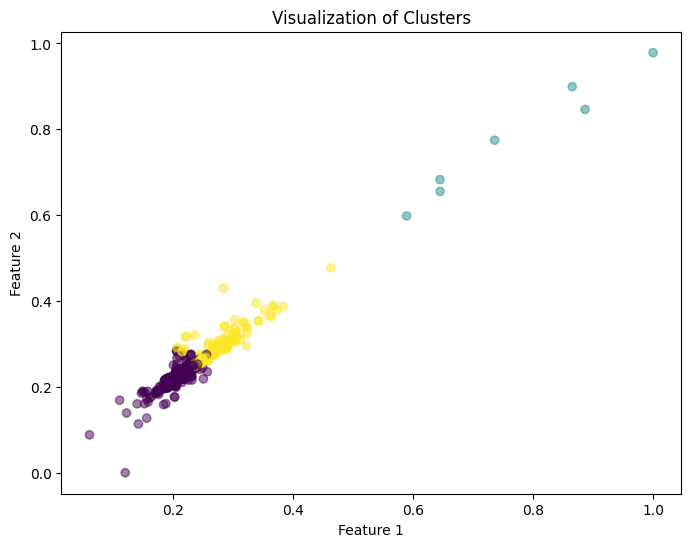

In [101]:
# 8. Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=X_train['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Clusters')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

In [102]:

label_encoder = LabelEncoder()


df_normalized = X_train.copy()  # Menggunakan X_train sebagai dasar df_normalized

# Mengganti 'Feature1' dengan nama kolom yang sesuai di dataset Anda, misalnya '2020'
# Pastikan kolom yang dipilih berisi data kategorikal yang telah di-encode sebelumnya
# agar inverse_transform berfungsi dengan benar.
feature_column = '2020'  # Or any other numerical column from your dataset

# Check if the selected column exists in the DataFrame
if feature_column not in df_normalized.columns:
    raise KeyError(f"Column '{feature_column}' not found in the DataFrame. Please choose a valid column.")

# --- Perbaikan: Fit dan Transform LabelEncoder sebelum scaling ---
# 1. Buat salinan kolom asli sebelum scaling
df_normalized['Fitur_Original'] = df_normalized[feature_column]

# 2. Fit dan transform LabelEncoder pada kolom asli
label_encoder.fit(df_normalized['Fitur_Original'])
df_normalized['Fitur'] = label_encoder.transform(df_normalized['Fitur_Original'])
df_original = df.copy()

# ... (your other code) ...

# Before applying inverse_transform, create 'Fitur_Numerik' and assign values
# Change '2020' to the actual numeric column you want to inverse transform
df_normalized['Fitur_Numerik'] = df_normalized['2020']

# Instead of transforming only 'Fitur_Numerik', transform all numeric features
# Get a list of numeric features (excluding 'Cluster', 'Fitur', 'Fitur_Original')
numeric_features = [col for col in df_normalized.columns if col not in ['Cluster', 'Fitur', 'Fitur_Original', 'Fitur_Numerik']]

# Now you can apply inverse_transform on all numeric features
df_normalized[numeric_features] = scaler.inverse_transform(df_normalized[numeric_features])



In [103]:
# Assuming 'kmeans' is your trained KMeans model
X_train['Cluster'] = kmeans.labels_  # Changed 'df_normalized' to 'X_train'

In [104]:
# Kemudian, saat Anda ingin melakukan inverse_transform:
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized['Fitur']) # This line should now work without error

In [105]:
df_original['Fitur'] = df_normalized['Fitur']

In [106]:
df_normalized[['Fitur_Numerik']] = df_normalized[['2020']]

# Analisis Karakteristik Cluster dari Model KMeans
## Cluster 1:
- **Rata-rata nilai '2020-2023' pada cluster 1**: 1.4165737907823826e+27
- **Fitur yang paling sering muncul pada cluster 1** : 0.20406750950145353

- **Analisis**: Cluster 1 memiliki rata-rata nilai keuangan perusahaan pada tahun '2020-2023' sebesar 1.4165737907823826e+27. jumlah yang paling dominan pada cluster ini adalah 0.20406750950145353.

## Cluster 2
- **Rata-rata nilai '2020-2023' pada cluster 2**: 2.3014807227387924e+30
- **Fitur yang paling sering muncul pada cluster 2**: 0.5888985749938356
- **Analisis**:  Cluster 2 memiliki rata-rata nilai keuangan perusahaan pada tahun '2020-2023' 014807227387924e+30. Fitur yang paling sering muncul pada cluster ini adalah 0.5888985749938356.

# **7. Mengeksport Data**


In [113]:
X_train.to_csv("Dataset_clustering.csv", index=False)
print("Data hasil clustering telah diekspor sebagai clustered_data.csv")
files.download("Dataset_clustering.csv")

Data hasil clustering telah diekspor sebagai clustered_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>